## LOAN PREDICTION ANALYSIS

## Import Modules

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("Loan_train_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## Preprocessing

In [14]:
#find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# fill missing numerical null values by mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())


In [16]:
# fill missing categorical null values by mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

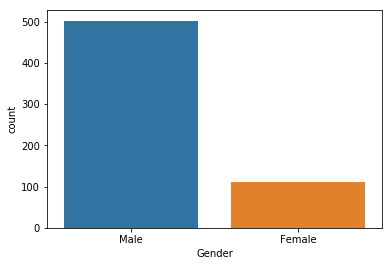

In [18]:
sns.countplot(df['Gender'])

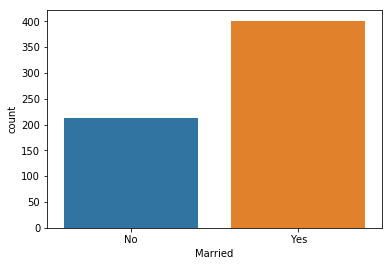

In [19]:
sns.countplot(df['Married'])

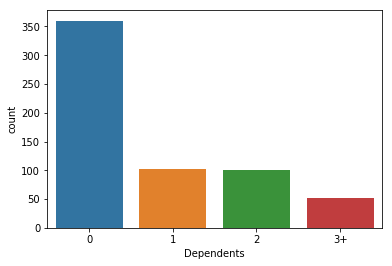

In [20]:
sns.countplot(df['Dependents'])

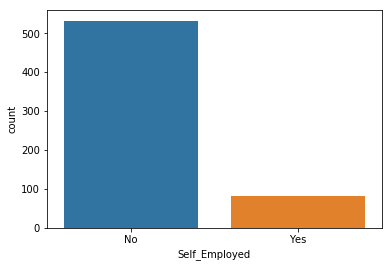

In [21]:
sns.countplot(df['Self_Employed'])

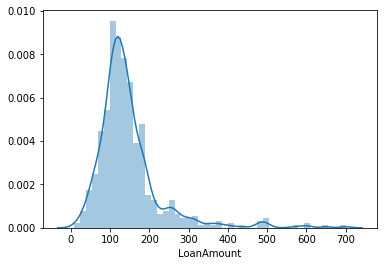

In [22]:
sns.distplot(df['LoanAmount'])

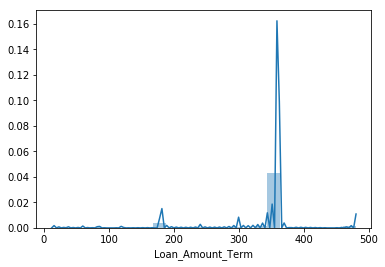

In [23]:
sns.distplot(df['Loan_Amount_Term'])

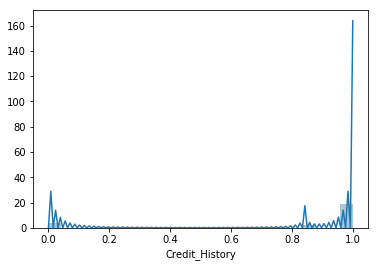

In [24]:
sns.distplot(df['Credit_History'])

In [25]:
# Create New Attribute
df['TotalApplicantIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

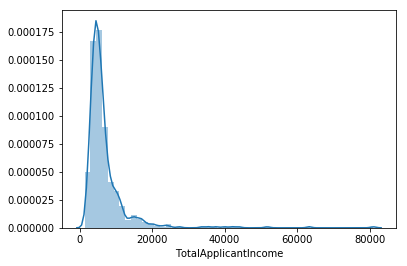

In [26]:
sns.distplot(df['TotalApplicantIncome'])

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Log Transformation of Skewed Attributes

In [28]:
df['TotalApplicantIncomeLog']  = np.log(df['TotalApplicantIncome'])
df['LoanAmountLog']  = np.log(df['LoanAmount'])
df['Loan_Amount_TermLog']  = np.log(df['Loan_Amount_Term'])


In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,TotalApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,5.886104


## Coorelation Matrix

corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap="BuPu")

### Drop unnecessary columns

In [30]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "TotalApplicantIncome", 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,4.787492,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104


## Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
for col in cols:
    df[col] = le.fit_transform(df[col])


In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104
1,1,1,1,0,0,1.0,0,0,8.714568,4.852030,5.886104
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.0,2,1,8.505323,4.787492,5.886104
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104


In [33]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

## Model Training

In [34]:
dtrain= pd.get_dummies(df)
import xgboost as xgb
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV 
train = dtrain
target = 'Loan_Status'
dtrain.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,1,0,0,0
1,1,1,0,0,1.0,0,0,8.714568,4.852030,5.886104,0,1,0,0
2,1,1,0,1,1.0,2,1,8.006368,4.189655,5.886104,1,0,0,0
3,1,1,1,0,1.0,2,1,8.505323,4.787492,5.886104,1,0,0,0
4,1,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,1,0,0,0


In [35]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Loan_Status'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Loan_Status'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Loan_Status'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [36]:
#Choose all predictors except target & IDcols
from xgboost import XGBClassifier
predictors = [x for x in train.columns if x not in [target]]
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, train, predictors)


Model Report
Accuracy : 0.8306
AUC Score (Train): 0.897919


TypeError: 'NoneType' object is not callable